## Importing modules

In [5]:
%matplotlib widget

from pyCascade import probePost, physics
from matplotlib import pyplot as plt


In [6]:
# working_dir = pathlib.Path().absolute()
working_dir = '/home/nbachand/Documents/Cascade/city_block'

probes = probePost.Probes(f'{working_dir}/CHARLES/probes/probesOut')
probes.get_locations(f'{working_dir}/CHA\RLES/probes/locations')


In [7]:
LES_params = {
    'uStar': 0.1,
    'z0': 0.61,
    'disp': 11.1,
    'vK_const': 0.4
}
physics_setup = physics.LES_Physics(LES_params)

reading data took 0 seconds
memorizing data took 0 seconds
plotting took 1 seconds


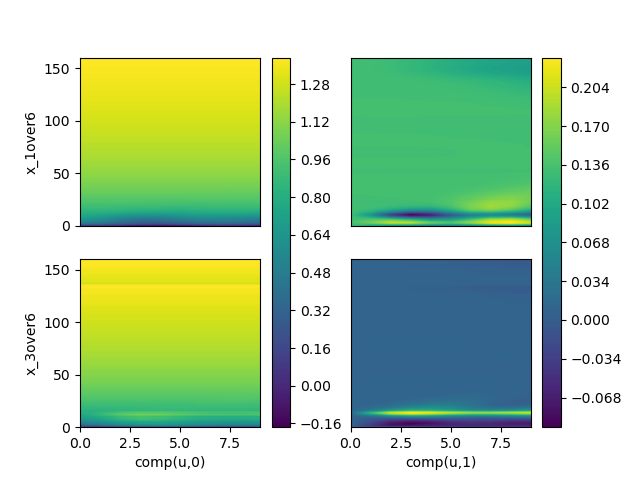

In [8]:
plot_params = {
    'plot_levels' : {
        # 'comp(u,0)' : np.linspace(0,.5,200),
        # 'comp(u,1)' : np.linspace(0,4,200)
    }
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    # names = ['x_1over6','x_3over6'], 
    steps = probes.probe_steps[0:10],
    # vars = ['comp(u,0)', 'comp(u,1)'],
    # parrallel = True,
    plot_params = plot_params
    )


In [9]:
plt.savefig(f'{working_dir}/CHARLES/probes/plots/velocity_contour')

reading data took 0 seconds
memorizing data took 0 seconds
processing data took 0 seconds
plotting took 1 seconds


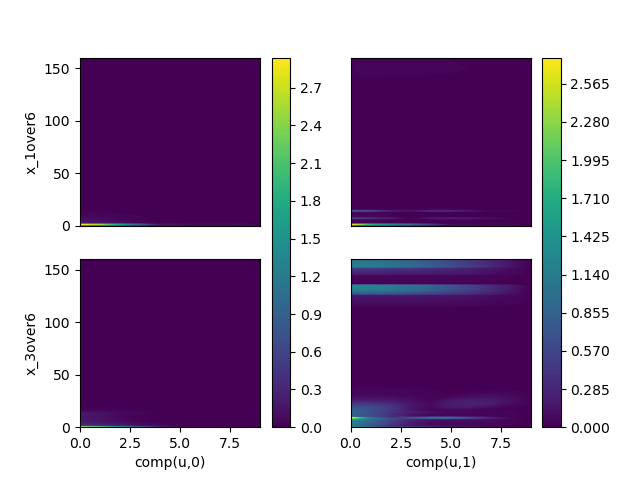

In [10]:
plot_params = {
    'plot_levels' : {
        # 'comp(u,0)' : np.linspace(0,.5,200),
        # 'comp(u,1)' : np.linspace(0,4,200)
    }
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    names = ['x_1over6','x_3over6'], 
    steps = probes.probe_steps[0:10],
    vars = ['comp(u,0)', 'comp(u,1)'],
    # parrallel = True,
    processing = [probePost.mean_convergence],
    plot_params = plot_params
    )